<a href="https://colab.research.google.com/github/KwasiArhin/Movie_Capstone/blob/master/TensorFlow_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Background

# Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Tensorflow dependcies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization 
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model 


import json

In [0]:
#mounting my google drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# The Dataset

In [0]:
#Reading in my data 
data = "/content/drive/My Drive/Shot Classification Capstone/Train"

#Setting the sizing for the images
img_width, img_height = 150, 150
batch_size = 80

In [0]:
#This block of code is used to ensure the input shape is correct

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [0]:
#Data Augmentations 
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.3,
    validation_split=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    rotation_range=30,
    fill_mode="nearest")


The generator is defined below

In [0]:
#Splitting the Training Set 
train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(img_width, img_height),
    subset='training',
    batch_size=batch_size,
    classes=['CU','ECU','EWS','LS','MCU'],
    class_mode='categorical')

Found 2069 images belonging to 5 classes.


In [0]:
#Validation Set 
validation_generator = train_datagen.flow_from_directory(
    data,
    target_size=(img_width, img_height),
    subset='validation',
    batch_size=batch_size,
    classes=['CU','ECU','EWS','LS','MCU'],
    class_mode='categorical')

Found 513 images belonging to 5 classes.


In [0]:
n_training = 2069
n_valid = 513

epochs = 10

# Shot Types

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Simple CNN Model

In [0]:
#Defining the Model 
model = Sequential()

#Model Configuration 

#1st Hidden Layer
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#2nd Hidden Layer 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
#output layer 
model.add(Dense(5))
model.add(Activation('softmax'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                22429760  
_________________________________________________________________
activation_7 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

### Compiling Model

In [0]:
#Compiling Model 
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Fitting the Model 

In [0]:
history = model.fit(
    train_generator,
    steps_per_epoch=n_training // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=n_valid // batch_size)

Epoch 1/10
25/25 [==============================] - 679s 27s/step - loss: 4.8696 - accuracy: 0.5965 - val_loss: 1.1890 - val_accuracy: 0.5708
Epoch 2/10
25/25 [==============================] - 64s 3s/step - loss: 0.7303 - accuracy: 0.7456 - val_loss: 0.9530 - val_accuracy: 0.6646
Epoch 3/10
25/25 [==============================] - 63s 3s/step - loss: 0.6156 - accuracy: 0.7788 - val_loss: 0.7141 - val_accuracy: 0.7354
Epoch 4/10
25/25 [==============================] - 62s 2s/step - loss: 0.5170 - accuracy: 0.8185 - val_loss: 1.1439 - val_accuracy: 0.6375
Epoch 5/10
25/25 [==============================] - 64s 3s/step - loss: 0.4691 - accuracy: 0.8281 - val_loss: 0.7613 - val_accuracy: 0.7250
Epoch 6/10
25/25 [==============================] - 63s 3s/step - loss: 0.4242 - accuracy: 0.8587 - val_loss: 0.8924 - val_accuracy: 0.6854
Epoch 7/10
25/25 [==============================] - 63s 3s/step - loss: 0.4000 - accuracy: 0.8527 - val_loss: 0.6476 - val_accuracy: 0.7625
Epoch 8/10
25/25 [

## Plotting the model results

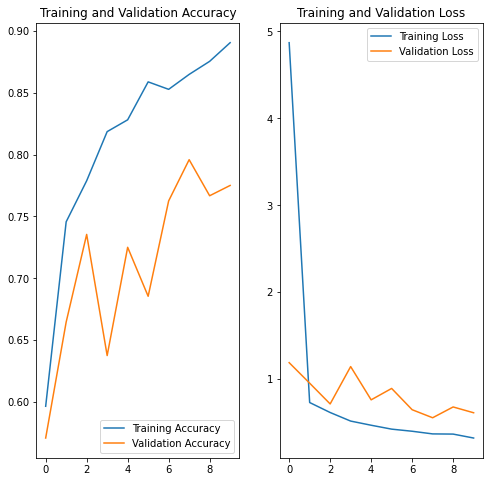

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Saviing the model

In [0]:
model.save('content/drive/My Drive/Shot Classification Capstone/Train/Models/mymodel.h5')

OSError: ignored

In [0]:
my_model = load_model('/content/drive/My Drive/Shot Classification Capstone/Train/Models/mymodel.h5')

In [0]:
with open('/content/drive/My Drive/Movie Images/Models/myclasses.json','w') as f:
  json.dump(train_generator.class_indices,f)


# 2nd Model 

Create a new model by adding an additional group of convolution, activation and max pooling layers before the flatten layer. Make the convolution layer of unit size 32. Keep everything else the same.

In [0]:
#Initiating model 
model2 = Sequential()

#Configuring model 
#First Hidden Layer 
model2.add(Conv2D(64, (3, 3), input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
#2nd Hidden Layer 
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
#3rd Hidden Layer 
model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('relu'))
#Output Layer 
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

In [0]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

## Compiling Model 

In [0]:
model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Fitting The Model

In [0]:
history = model2.fit(
    train_generator,
    steps_per_epoch=n_training // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=n_valid // batch_size)

Epoch 1/10
25/25 [==============================] - 1724s 69s/step - loss: 0.6310 - accuracy: 0.7768 - val_loss: 0.5350 - val_accuracy: 0.8000
Epoch 2/10
25/25 [==============================] - 101s 4s/step - loss: 0.5193 - accuracy: 0.8000 - val_loss: 0.5164 - val_accuracy: 0.8000
Epoch 3/10
25/25 [==============================] - 67s 3s/step - loss: 0.5131 - accuracy: 0.8000 - val_loss: 0.5116 - val_accuracy: 0.8000
Epoch 4/10
25/25 [==============================] - 67s 3s/step - loss: 0.5104 - accuracy: 0.8000 - val_loss: 0.5046 - val_accuracy: 0.8000
Epoch 5/10
25/25 [==============================] - 70s 3s/step - loss: 0.5078 - accuracy: 0.8000 - val_loss: 0.5091 - val_accuracy: 0.8000
Epoch 6/10
25/25 [==============================] - 68s 3s/step - loss: 0.5062 - accuracy: 0.8000 - val_loss: 0.5032 - val_accuracy: 0.8000
Epoch 7/10
25/25 [==============================] - 67s 3s/step - loss: 0.5049 - accuracy: 0.8000 - val_loss: 0.5092 - val_accuracy: 0.8000
Epoch 8/10
25/25

### plotting the Model

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 3rd Model

In [0]:
#Design of Neural network Architecture 

model = Sequential()

#1st Hidden Layer:
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#2nd Hidden Layer:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

#
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit_generator(
    train_generator,
    steps_per_epoch=25,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=15)

 # RESNET50 MODEL 

In [0]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model 

In [0]:
#Definining resnet50 
resnet= ResNet50(weights='imagenet',include_top=False,input_shape=input_shape)

94773248/94765736 [==============================] - 2s 0us/step


In [0]:
#Feeding into conv2d
x= Conv2D(32,(3,3),activation='relu')(resnet.output)
x = MaxPooling2D(2,2)(x)
x = Flatten()(x)
output = Dense(5,activation='softmax')(x)

model2 = Model(inputs=resnet.input,outputs=output)

In [0]:

model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
history2 = model2.fit(
    train_generator,
    steps_per_epoch=n_training // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=n_valid // batch_size)

Epoch 1/10
25/25 [==============================] - 65s 3s/step - loss: 1.7327 - accuracy: 0.6858 - val_loss: 480.3997 - val_accuracy: 0.5979
Epoch 2/10
25/25 [==============================] - 64s 3s/step - loss: 0.4409 - accuracy: 0.8522 - val_loss: 3.0110 - val_accuracy: 0.0771
Epoch 3/10
25/25 [==============================] - 65s 3s/step - loss: 0.4990 - accuracy: 0.8477 - val_loss: 103.9535 - val_accuracy: 0.0812
Epoch 4/10
25/25 [==============================] - 63s 3s/step - loss: 0.2892 - accuracy: 0.9045 - val_loss: 3123.2502 - val_accuracy: 0.0792
Epoch 5/10
25/25 [==============================] - 64s 3s/step - loss: 0.4371 - accuracy: 0.8673 - val_loss: 1.6008 - val_accuracy: 0.1000
Epoch 6/10
25/25 [==============================] - 64s 3s/step - loss: 0.5081 - accuracy: 0.9050 - val_loss: 21763682.0000 - val_accuracy: 0.0771
Epoch 7/10
25/25 [==============================] - 63s 3s/step - loss: 0.2712 - accuracy: 0.9140 - val_loss: 14125955.0000 - val_accuracy: 0.6125

In [0]:
epochs = 10

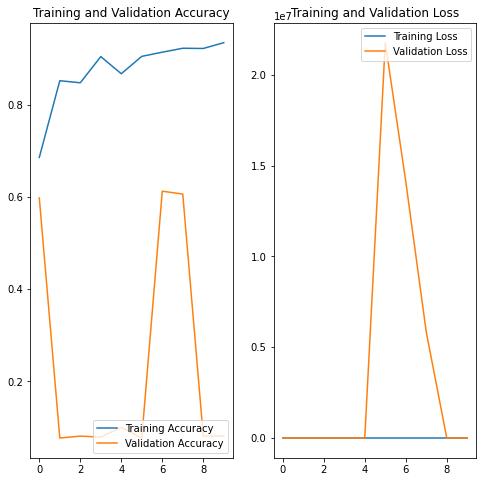

In [0]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## VGGNET19

In [0]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model 

In [0]:
#Definining VGG19
VGG19 = VGG19(weights='imagenet',include_top=False,input_shape=input_shape)

80142336/80134624 [==============================] - 1s 0us/step


In [0]:
#Feeding into conv2d
x= Conv2D(32,(3,3),activation='relu')(VGG19.output)
x = MaxPooling2D(2,2)(x)
x = Flatten()(x)
output = Dense(5,activation='softmax')(x)

model3 = Model(inputs=VGG19.input,outputs=output)

In [0]:
model3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
history3 = model3.fit(
    train_generator,
    steps_per_epoch=n_training // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=n_valid // batch_size)

Epoch 1/10
25/25 [==============================] - 65s 3s/step - loss: 55246.6914 - accuracy: 0.5319 - val_loss: 1.1966 - val_accuracy: 0.6146
Epoch 2/10
25/25 [==============================] - 65s 3s/step - loss: 1.2370 - accuracy: 0.6068 - val_loss: 1.2282 - val_accuracy: 0.5938
Epoch 3/10
25/25 [==============================] - 64s 3s/step - loss: 1.2580 - accuracy: 0.5872 - val_loss: 1.1964 - val_accuracy: 0.6104
Epoch 4/10
25/25 [==============================] - 64s 3s/step - loss: 1.3623 - accuracy: 0.5802 - val_loss: 1.1565 - val_accuracy: 0.6042
Epoch 5/10
25/25 [==============================] - 64s 3s/step - loss: 1.1954 - accuracy: 0.5797 - val_loss: 1.1732 - val_accuracy: 0.6000
Epoch 6/10
25/25 [==============================] - 64s 3s/step - loss: 1.1562 - accuracy: 0.6154 - val_loss: 1.1977 - val_accuracy: 0.6292
Epoch 7/10
25/25 [==============================] - 64s 3s/step - loss: 1.2872 - accuracy: 0.5963 - val_loss: 1.2052 - val_accuracy: 0.6125
Epoch 8/10
25/25

In [0]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss=history3.history['loss']
val_loss=history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

# Conclusion 